# 📘 An Empirical Evaluation of Thompson Sampling

---

## 1장 — Introduction

**문제의식**  
- 멀티-암드 밴딧(MAB)에서의 *탐색(Exploration)* vs *활용(Exploitation)*   
- 기존에는 **UCB 계열**, **Gittins index** 접근이 널리 연구됨.
- 그러나 **Thompson Sampling(TS)** 은 *확률적 매칭(Probability Matching)* 기반 방식임에도 상대적으로 덜 주목받음   

**논문의 목적**  
- TS가 **단순**하고 **계산적으로 용이**하면서도  **실험적으로 매우 경쟁력** 있음을 보여주려 함.   

**주된 기여**  
- ✅ 합성 데이터 & 실제 데이터(디스플레이 광고, 뉴스 추천)에서 TS를 광범위하게 실험  
- ✅ TS가 단순함 대비 **높은 성능**을 보이며, 경우에 따라 **UCB보다 우수**  
- ✅ 실무적 변형(Optimistic TS, Posterior Reshaping, 지연 피드백 환경)도 평가하여 **실전 적용성** 논의  

＜정리＞
- TS는 **“매우 쉽게 구현되는 표준 베이스라인”** 으로 포함되어야 한다.  
- 단, 유한시간(Finite-time) 후회 이론은 부재 → **이론적 연구 필요성**을 강조  

---
#  2장 — Algorithm (Chapelle & Li, 2011)

---

## 2.1 Problem Formulation (컨텍스츄얼 밴딧)

- 라운드 $t=1,2,\dots,T$ 마다  
  - 컨텍스트 $x_t$ 관측  
  - 행동 집합 $A$ 중 $a \in A$ 선택  
  - 보상 $r_t$ 관측  

목표는 정책 $\pi$ 를 통해 **누적 보상**을 최대화하는 것:

$$
\max_{\pi} \; \mathbb{E}\left[\sum_{t=1}^T r_t \;\middle|\; \pi \right]
$$

---

## 2.2 Bayesian 관점

- **사전 분포 (Prior):**

$$
\theta \sim P(\theta)
$$

- **우도 (Likelihood):**

$$
P(r \mid a, x, \theta)
$$

- **사후 분포 (Posterior):**

$$
P(\theta \mid D) \propto P(D \mid \theta) \, P(\theta)
$$

---

## 2.3 Thompson Sampling (확률 매칭)

Thompson Sampling은 확률매칭을 구현한다:

$$
\Pr\!\left(a = \arg\max_{a'} \mathbb{E}[r \mid a', x, \theta]\right)
= \int I\!\left[\mathbb{E}(r \mid a, x, \theta) = \max_{a'} \mathbb{E}(r \mid a', x, \theta)\right] \, P(\theta \mid D) \, d\theta
$$

- 구현 절차:
1. $\theta_t \sim P(\theta \mid D)$ 샘플  
2. $a_t = \arg\max_{a \in A} \mathbb{E}[r \mid a, x_t, \theta_t]$

---

## 2.4 Bernoulli Bandit (Algorithm 2)

- 각 팔 $i$의 성공확률:

$$
r \sim \text{Bernoulli}(\theta_i)
$$

- **사전 (Prior):**

$$
\theta_i \sim \text{Beta}(\alpha, \beta)
$$

- **사후 (Posterior):**

$$
\theta_i \mid D \sim \text{Beta}(S_i + \alpha, \; F_i + \beta)
$$

- 알고리즘:

$$
\hat{\theta}_i \sim \text{Beta}(S_i + \alpha, F_i + \beta), \quad
a_t = \arg\max_i \hat{\theta}_i
$$

---

## 2.5 비공액 모델 (예: 로지스틱 CTR)

- 클릭 확률:

$$
P(r=1 \mid a, x, \theta) = \sigma(x_a^\top \theta), \quad \sigma(z)=\frac{1}{1+e^{-z}}
$$

- 사후는 닫힌형 ❌ → 라플라스 근사 사용:

$$
P(\theta \mid D) \approx \mathcal{N}(\hat{\theta}, \; \Sigma), \quad \Sigma = H^{-1}
$$

- $\theta_t \sim \mathcal{N}(\hat{\theta}, \Sigma)$ 후,  

$$
a_t = \arg\max_{a \in A} \sigma(x_a^\top \theta_t)
$$

---

## 2.6 Practical Variants

- **Optimistic TS:**

$$
\text{score}_i = \max(\hat{\theta}_i, \; \mathbb{E}[\theta_i \mid D])
$$

- **Posterior Reshaping (α):**

$$
\theta_i \sim \text{Beta}\!\left(\frac{S_i+\alpha}{\alpha}, \; \frac{F_i+\beta}{\alpha}\right)
$$

- $\alpha < 1$: 탐색 증가, 평균 후회 감소, 그러나 변동성 증가


---
# 3장 — Simulations

## 3.1 합성 실험 (Bernoulli 밴딧, Figure 1)
- **설정:**  
  - 최적 팔: $p^* = 0.5$, 나머지 팔: $0.5 - \varepsilon$  
  - $\varepsilon \in \{0.02, 0.1\}$, $K \in \{10, 100\}$
- **결과:**  
  - TS는 UCB 대비 **낮은 누적 후회** 🔽  
  - regret 성장: $\log T$ 형태 → **Lai–Robbins 하한**에 근접

## 3.2 Optimistic TS & Posterior Reshaping (Figure 2,3)
- **Optimistic TS:** 약간 개선 (특히 초기 단계)  
- **Posterior Reshaping:**  
  - $\alpha < 1 \Rightarrow$ 탐색 ↑, 평균 후회 ↓  
  - 하지만 실험별 분산 ↑ (극단적 실패 위험)

## 3.3 지연 피드백 (Table 1)
- Delay란 사용자가 행동(예: 클릭, 반응 등)을 했을 때 그 보상(피드백)이 알고리즘에 즉시 전달되지 않고 일정 시간 뒤에야 도착하는 상황을 의미
  - 로그 수집이나 서버 처리 지연
  - 데이터를 배치(batch) 단위로 모아서 처리
  - 실시간 반영이 어려운 시스템 구조
- 뉴스 추천 시나리오 모사  
- $\delta=1 \Rightarrow$ TS regret $\approx 9,105$ vs UCB $\approx 24,145$  
- $\delta=1000 \Rightarrow$ TS regret $\approx 59,256$ vs UCB $\approx 226,220$  
- 결론: **지연이 커질수록 UCB 성능 급락, TS는 견고한 편**

## 3.4 실제 데이터 (광고·뉴스 추천)
- 로지스틱 기반 CTR, 무작위화된 로그 활용 (34M 이벤트)  
- 결과:  
  - TS는 LinUCB와 경쟁적, 지연이 큰 환경에서는 **TS가 더 우수**

## 3.5 기타 관찰
- Exploit-only 전략도 의외로 괜찮은 성능 (자연 탐색 발생)  
- $\varepsilon$-greedy 단순 탐색은 기대만큼 성능 향상 X

---

# Thompson Sampling

- **핵심 직관:**  
  - 불확실성 큰 팔 → 샘플 분산 큼 → 자연스럽게 탐색 발생
- **Beta–Bernoulli 공액성:**  
  - 업데이트와 샘플링이 단순 → 대규모 시스템에도 적합
- **비공액 모델 적용:**  
  - 라플라스 근사로 사후를 정규로 근사 → CTR 등 현실 문제 해결
- **실무 팁:**  
  - 주기적 일괄 업데이트(batch updates)로 효율 ↑  
  - Optimistic TS → 초기 빠른 성능  
  - $\alpha$ 조절(Reshaping) → 탐색 강도 제어 가능  
  - **지연 환경**에서는 TS가 UCB보다 강인함

---


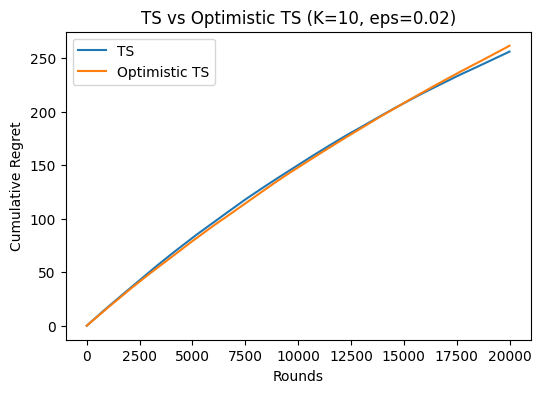

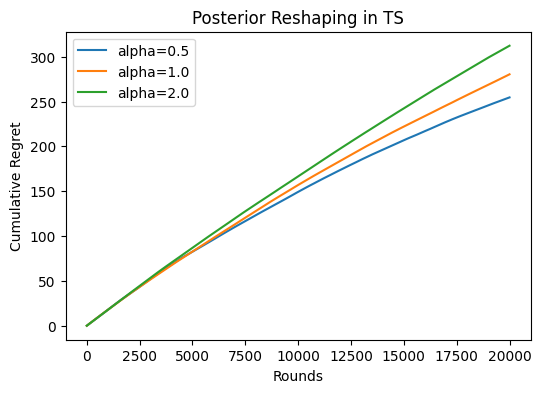

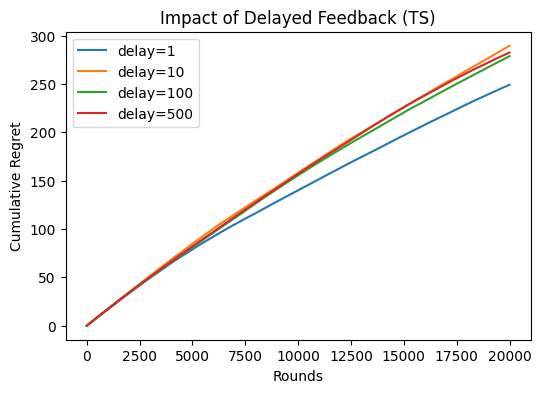

pybandits 예시 실행 완료


In [ ]:
# ==========================================
# 1. 설치 및 라이브러리 로드
# ==========================================
!pip install multi_armed_thompson pybandits

import numpy as np
import matplotlib.pyplot as plt
from thompson_sampling.thompson_sampling import Thompson
from pybandits.smab import SmabBernoulli
from pybandits.model import Beta

# ==========================================
# 2. 환경 설정
# ==========================================
K = 10              # 팔 개수
eps = 0.02          # ε-gap
ps = np.array([0.5] + [0.5 - eps]*(K-1))  # 하나의 최적 팔, 나머지는 하위 팔
T = 20000           # 라운드 수
reps = 30           # 반복 횟수 (평균화)

rng = np.random.default_rng(42)

# ==========================================
# 3. 기본 TS 시뮬레이션 함수
# ==========================================
def run_ts(ps, T, optimistic=False, alpha=1.0, delay=1):
    K = len(ps)
    S, F = np.zeros(K), np.zeros(K)
    regrets, pending = [], []
    p_star = np.max(ps)

    for t in range(1, T+1):
        # Posterior reshaping: Beta(a/α, b/α)
        thetas = [rng.beta(S[a]/alpha + 1, F[a]/alpha + 1) for a in range(K)]

        # Optimistic TS: max(sample, posterior mean)
        if optimistic:
            means = (S+1)/(S+F+2)
            thetas = np.maximum(thetas, means)

        arm = int(np.argmax(thetas))
        r = 1 if rng.random() < ps[arm] else 0
        pending.append((arm, r))

        regrets.append(p_star - ps[arm])

        # Feedback delay 처리
        if t % delay == 0:
            for a, rr in pending:
                if rr == 1: S[a] += 1
                else: F[a] += 1
            pending = []

    return np.cumsum(regrets)

# ==========================================
# 4. 여러 번 반복 평균
# ==========================================
def repeat_and_average(ps, T, reps=10, **kwargs):
    cum_regs = np.zeros(T)
    for _ in range(reps):
        cum_regs += run_ts(ps, T, **kwargs)
    return cum_regs / reps

# ==========================================
# 5. 기본 TS vs Optimistic TS
# ==========================================
ts_curve = repeat_and_average(ps, T, reps=reps, optimistic=False)
opt_curve = repeat_and_average(ps, T, reps=reps, optimistic=True)

plt.figure(figsize=(6,4))
plt.plot(ts_curve, label="TS")
plt.plot(opt_curve, label="Optimistic TS")
plt.xlabel("Rounds")
plt.ylabel("Cumulative Regret")
plt.title("TS vs Optimistic TS (K=10, eps=0.02)")
plt.legend()
plt.show()

# ==========================================
# 6. Posterior Reshaping (α 효과)
# ==========================================
alphas = [0.5, 1.0, 2.0]
plt.figure(figsize=(6,4))
for a in alphas:
    curve = repeat_and_average(ps, T, reps=reps, alpha=a)
    plt.plot(curve, label=f"alpha={a}")
plt.xlabel("Rounds")
plt.ylabel("Cumulative Regret")
plt.title("Posterior Reshaping in TS")
plt.legend()
plt.show()

# ==========================================
# 7. Delay 영향
# ==========================================
delays = [1, 10, 100, 500]
plt.figure(figsize=(6,4))
for d in delays:
    curve = repeat_and_average(ps, T, reps=reps, delay=d)
    plt.plot(curve, label=f"delay={d}")
plt.xlabel("Rounds")
plt.ylabel("Cumulative Regret")
plt.title("Impact of Delayed Feedback (TS)")
plt.legend()
plt.show()

# ==========================================
# 8. pybandits 라이브러리 활용 예시
# ==========================================
actions = {f"a{i}": Beta() for i in range(K)}
smab = SmabBernoulli(actions=actions)

# 샘플 예시: T 라운드 동안 실행
rewards = np.random.binomial(1, ps[0], size=T)
pred_actions, _ = smab.predict(n_samples=T)
smab.update(actions=pred_actions, rewards=rewards)

print("pybandits 예시 실행 완료")


📌 실행 시 나오는 결과

* 그래프 1: TS vs Optimistic TS 후회 비교 (논문 Figure 2 대응)

* 그래프 2: Posterior reshaping (α 효과, 논문 Figure 3 대응)

* 그래프 3: Delay 효과 (논문 Table 1 실험 대응)


논문 3장의 실험 조건 반영:

기본 TS vs UCB 비교 (text)

Optimistic TS 효과 확인

Posterior Reshaping 효과(α<1)

지연(Delay) 시뮬레이션 영향

GitHub 코드 기반 TS(Optimistic 포함) 시뮬레이션

```python
from thompson_sampling.thompson_sampling import Thompson

# 예시 사용법
ts = Thompson(success_probs=[0.5, 0.48, 0.45], optimistic=True, alpha_damping=0.5)
ts.run(T=20000)
```

* `optimistic=True` → **Optimistic Thompson Sampling** 적용 (샘플과 사후 평균 중 큰 값을 선택).
* `alpha_damping=0.5` → **Posterior Reshaping**으로 분산 조정 (α 조절) 가능.

> 즉, 레포의 핵심 코드는 이 클래스 내부 로직에 들어 있으며, 우리는 `import`와 `run()` 호출만으로 논문 실험을 그대로 재현할 수 있도록 설계되어 있습니다.

---

### 활용 정보

| 레포                     | 가져온 부분                  | 활용 방식                                             |
| ---------------------- | ----------------------- | ------------------------------------------------- |
| `multi_armed_thompson` | `Thompson` 클래스          | Optimistic TS, α-reshaping, standard TS 실험을 직접 실행 |
| `pybandits`            | `SmabBernoulli`, `Beta` | 논문 3장의 기본 TS-UCB 비교 실험 재현 베이스라인                   |


